## Let's Regex


**[re methods 1+2. search(pattern, string),  findall(pattern, string)](#1)**

[match \w+ \d+ [A-z]+ [0-9]+](#1.1)

[match specific date patterns](#1.2)

[Difference between matching one condition and numerous (or) conditions](#1.3)

[The ^ sign](#1.4)

[advenced regex 1](#1.5)

[advenced regex 2](#1.6)


**[re method 3. split(pattern, string)](#3)**

**[re method 4. sub(pattern, repl, string)](#4)**

**[advanced regex with a get request](#5)**


**[RegEx One](#6)**



#### The most common tasks for RegEx include:
- finding a substring within a string
- breaking strings into substrings
- replacing parts of a string with other strings

In [2]:
import re

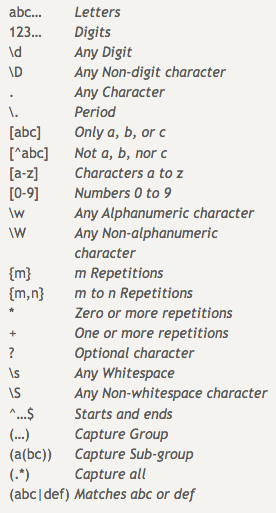

<a class="anchor" id="1"></a>
### re methods 1+2. search(pattern, string),  findall(pattern, string)

In [3]:
# re.serach - returns only returns the first substring it finds
# re.findall - returns all the substrings 

<a class="anchor" id="1.1"></a>
#### match \w+ \d+ [A-z]+ [0-9]+

##### "General Slocum" 15 June 1904 East River _  human factor _%__ %& 4

<b> \w+ </b> Returns any letter, digit or _ 

In [4]:
# return only the first letter/digit/_ it encounters 
string = '"General Slocum" 15 June 1904 East River. _ human factor _%__ %& 4'
print(re.search('\w+', string))

# return without all the search data - using the .group()
print(re.search('\w+', string).group())

<_sre.SRE_Match object; span=(1, 8), match='General'>
General


#### re.search - first match only 

In [5]:
# without ^ - will ignore the beginning of the string (") and continue until first match
print(re.search('\w+', string))
# return the first \w+ using ^ and " is hard coding identifiy
print(re.search('"\w+', string).group())

# match any first char followed by a letter char sequence
print(re.search('.\w+', string).group())

# match any first char followed by a single letter char 
print(re.search('.\w', string).group())


#==========
print('\n')


# return the first \w+ using ^ returns none, because \w+ it assumes that ths strings starts with char/digit/_
print(re.search('^\w+', string))

# return the first \w+ using ^ and " is hard coding identifiy
print(re.search('^"\w+', string).group())

# match any first char followed by a letter char sequence
print(re.search('^.\w+', string).group())

# match any first char followed by a single letter char 
print(re.search('^.\w', string).group())

<_sre.SRE_Match object; span=(1, 8), match='General'>
"General
"General
"G


None
"General
"General
"G


#### re.findall - all matches

In [6]:
string = '"General Slocum" 15 June 1904 East River _ human factor _%__ %& 4'
# return any letter/digit/_  with 1 or more instances, this disclude blank spaces and special chars 
print(re.findall('\w+', string))

# return any letter/digit/_  with 1 or more instances OR 1 instances only, this disclude blank spaces OR return blank spaces
print(re.findall('\w+|\w|\s', string))

# return any letter/digit/space
print(re.findall('.*', string))

['General', 'Slocum', '15', 'June', '1904', 'East', 'River', '_', 'human', 'factor', '_', '__', '4']
['General', ' ', 'Slocum', ' ', '15', ' ', 'June', ' ', '1904', ' ', 'East', ' ', 'River', ' ', '_', ' ', 'human', ' ', 'factor', ' ', '_', '__', ' ', ' ', '4']
['"General Slocum" 15 June 1904 East River _ human factor _%__ %& 4', '']


#### "General Slocum" 15 June 1904 East River. _  human factor _%__ %& 4

In [7]:
print(string + '\n')

print(re.findall('.+', string)) # return any continous chars that contain letter/_  
print(re.findall('.*', string)) # return any continous chars that contain letter/_  
print('\n')

print(re.findall('[A-z]+', string)) # return any continous chars that contain letter/_  
print(re.findall('\w+', string)) # return any continous chars that contain letter/digit/_  
print(re.findall('[^A-z]+', string)) # return any continues chars that DO NOT contain letter or _
print(re.findall('[^ ]+', string)) # reeturn any continous letter/digits/special, except space 

"General Slocum" 15 June 1904 East River _ human factor _%__ %& 4

['"General Slocum" 15 June 1904 East River _ human factor _%__ %& 4']
['"General Slocum" 15 June 1904 East River _ human factor _%__ %& 4', '']


['General', 'Slocum', 'June', 'East', 'River', '_', 'human', 'factor', '_', '__']
['General', 'Slocum', '15', 'June', '1904', 'East', 'River', '_', 'human', 'factor', '_', '__', '4']
['"', ' ', '" 15 ', ' 1904 ', ' ', ' ', ' ', ' ', ' ', '%', ' %& 4']
['"General', 'Slocum"', '15', 'June', '1904', 'East', 'River', '_', 'human', 'factor', '_%__', '%&', '4']


In [8]:
# The 
print(re.findall('[^\w+] ', string)) # does not return any word ant not any spaces
print(re.findall('[^\w] ', string)) # does not return any word ant not any spaces
print(re.findall('[^\w]+ ', string)) # does not return any word ant not any spaces

print('\n')
print(re.findall('[^\w]+', string)) # returns special chars and spaces 
print(re.findall('[^\w+]', string)) #return all that is not a word

['" ', '& ']
['" ', '& ']
['" ', ' %& ']


['"', ' ', '" ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', '%', ' %& ']
['"', ' ', '"', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', '%', ' ', '%', '&', ' ']


In [9]:
# return the same thing - any continous letters/digits
print(re.findall('\w+', string)) # will return all any letter, digit, 
print(re.findall('[A-z]+|[0-9]+', string)) # parse all continues chars for letters and digit and spaces chars
print('\n')

['General', 'Slocum', '15', 'June', '1904', 'East', 'River', '_', 'human', 'factor', '_', '__', '4']
['General', 'Slocum', '15', 'June', '1904', 'East', 'River', '_', 'human', 'factor', '_', '__', '4']




In [10]:
# first letter will return nothing unless siging \S
print('the ^ effect in the beginning: will not return anything unless signeing an "')
print(re.findall('^[A-z]+', string)) 
print(re.findall('^\w+', string))
print('\n')

print('the ^ effect in the beginning: possible with \S or with " ')
print(re.findall('^"\w+', string)) #start of string
print(re.findall('^\S+', string)) #start of string
print(re.findall('^\S\w*', string)) #start of string
print('\n')

# the space effect
print('the space effect:')
print(re.findall('[^A-z]+', string)) # return all continues except letters/words
print(re.findall('[^ A-z]+', string)) # return all continues except letters/words/spaces
print(re.findall('[^\w]+', string)) # return all continues except letters/words/spaces
print('\n')

the ^ effect in the beginning: will not return anything unless signeing an "
[]
[]


the ^ effect in the beginning: possible with \S or with " 
['"General']
['"General']
['"General']


the space effect:
['"', ' ', '" 15 ', ' 1904 ', ' ', ' ', ' ', ' ', ' ', '%', ' %& 4']
['"', '"', '15', '1904', '%', '%&', '4']
['"', ' ', '" ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', '%', ' %& ']




In [11]:
print(re.findall('\w+', string)) # will return all any letter, digit, or _ with 1 or more instances
print(re.findall('\w*', string)) # will return all any letter, digit, or _ with 0 or more instances

['General', 'Slocum', '15', 'June', '1904', 'East', 'River', '_', 'human', 'factor', '_', '__', '4']
['', 'General', '', 'Slocum', '', '', '15', '', 'June', '', '1904', '', 'East', '', 'River', '', '_', '', 'human', '', 'factor', '', '_', '', '__', '', '', '', '', '4', '']


<b> [0-9]+ and \d+ </b> Returns any digit or number  

In [12]:
# return only the first number value
print(re.search('[0-9]+', string).group())
print(re.search('\d+', string).group())

# return all numbers, notice the space effect
print(re.findall('[0-9]+', string))
print(re.findall('\d+', string)) # will return all any letter, digit, or _
print(re.findall('\d+ ', string)) # will return all any letter, digit, or _
print(re.findall(' \d+ ', string)) # will return all any letter, digit, or _

15
15
['15', '1904', '4']
['15', '1904', '4']
['15 ', '1904 ']
[' 15 ', ' 1904 ']


In [13]:
string_test = '"General Slocum" 15 June 1904 + East River. _  human factor _%__ %& 4'

In [14]:
# first match
print(re.search('[0-9]+', string_test).group())
print(re.search('[0-9+]', string_test).group())
print('\n')

# find all
print(re.findall('[0-9]+', string_test))
print(re.findall('[0-9+]', string_test)) #====== the plus sign is treated as a regular char!
print(re.findall('[0-9]', string_test))

15
1


['15', '1904', '4']
['1', '5', '1', '9', '0', '4', '+', '4']
['1', '5', '1', '9', '0', '4', '4']


<a class="anchor" id="1.2"></a>
#### match specific date patterns

In [15]:
# find specific dates 

# the key here- matching the different types of date patterns

print(re.findall('[A-z]+[0-9]+', string)) # no pattern where sequence of letters and numbers (no space between)
print(re.findall('[A-z]+ [0-9]+', string)) # pattern where sequence of letters and numbers (space between)
print('\n')

print(re.findall('\w+[0-9]+', string)) # will return all any letter/DIGIT/_ followed by a number (more then 1 char)
print(re.findall('\w+\d+', string)) # will return all any letter/DIGIT/_ followed by a number (more then 1 char)
print('\n')

# the space in the regex addressed as part of the serach pattern
print(re.findall('[A-z]+ [0-9]+', string)) # will return all any letter/igit/_ followed by space and a number
print(re.findall('\w+ [0-9]+', string)) # will return all any letter/igit/_ followed by space and a number
print(re.findall('\w+ \d+', string)) # will return all any letter/igit/_ followed by space and a number

print('\n')

# the space in the regex addressed as part of the serach pattern
print(re.findall('[0-9]+ [A-z]+ [0-9]+', string)) # will return all any letter, digit, or _
print(re.findall('[0-9]+ \w+ [0-9]+', string)) # will return all any letter, digit, or _
print(re.findall('\d+ [A-z]+ \d+', string)) # will return all any letter, digit, or _
print(re.findall('\d+ \w+ \d+', string))
print('\n')




[]
['June 1904']


['15', '1904']
['15', '1904']


['June 1904']
['June 1904']
['June 1904']


['15 June 1904']
['15 June 1904']
['15 June 1904']
['15 June 1904']




<a class="anchor" id="1.3"></a>
#### Difference between matching one condition and numerous (or) conditions

In [16]:
# difference between one condition and 'or' conditionds:
print(re.findall('[A-z]+ [0-9]+', string)) # one sequence including the blank space
print(re.findall('[A-z]+|[0-9]+', string)) # two possible matches: +1 letter or +1 digit

print(re.findall('[A-z]+| [0-9]+', string)) # match +1 letters OR only numbers with blank space to the left
print(re.findall('[A-z]+|[0-9]+ ', string)) # match +1 letters OR only numbers with blank space to the right
print(re.findall('[A-z]+| [0-9]+ ', string))# match +1 letters OR only numbers with blank spaces to both sides


['June 1904']
['General', 'Slocum', '15', 'June', '1904', 'East', 'River', '_', 'human', 'factor', '_', '__', '4']
['General', 'Slocum', ' 15', 'June', ' 1904', 'East', 'River', '_', 'human', 'factor', '_', '__', ' 4']
['General', 'Slocum', '15 ', 'June', '1904 ', 'East', 'River', '_', 'human', 'factor', '_', '__']
['General', 'Slocum', ' 15 ', 'June', ' 1904 ', 'East', 'River', '_', 'human', 'factor', '_', '__']


<a class="anchor" id="1.4"></a>
#### The ^ sign:
    - ^[]  match only the start of the string
    - [^]  filter out the substrings that matches the regex inside the brackets. 


In [17]:
#
print(re.findall('[^A-z]+|[^0-9]+', string)) # filter out all continues chars for letters and digit and spaces chars
print(re.findall('[^A-z]+|[^\d]+', string)) # filter out all continues chars for letters and digit and spaces chars

print(re.findall('[^\w]+|[^0-9]+', string)) 
print('\n')

### CRITICAL: 
# ^[] - address only the start of the string
# [^] - parse out the substring that matches the regex. 


print(re.findall('[^_]+', string)) # filter out all the continues chars except for _ chars 

print('\n')

print(re.findall('[^0-9]+', string)) # filter out all countinues chars except for numeric chars
print(re.findall('^[^0-9]+', string))
print(re.findall('[^[0-9]+]', string))

['"', 'General Slocum" ', '15 ', 'June ', '1904 ', 'East River _ human factor _%__ %& ', '4']
['"', 'General Slocum" ', '15 ', 'June ', '1904 ', 'East River _ human factor _%__ %& ', '4']
['"', 'General Slocum" ', ' ', 'June ', ' ', 'East River _ human factor _%__ %& ']


['"General Slocum" 15 June 1904 East River ', ' human factor ', '%', ' %& 4']


['"General Slocum" ', ' June ', ' East River _ human factor _%__ %& ']
['"General Slocum" ']
[]


<a class="anchor" id="1.5"></a>
#### advanced  regex 1

In [18]:
# match any substring that starts with S:
print(re.findall('S[\w]+', string))
print(re.findall('S\w+', string))
print('\n')

# drop any substring that starts with S:
print(re.sub('S\w+', '',string))
print(re.sub('S[\w]+', '',string))
print('\n')

#
print(re.sub('S[.+]', '',string))
print(re.sub('S.+', '',string))
print('\n')


# extract Slocum by hard coding including the space
print(re.findall('[^ Slocum][\w\%\d\&\.\*]+|[\d]', string))
print(re.findall('[^ Slocum | East][\w\%\d\&\.\*]+|[\d]', string))

['Slocum']
['Slocum']


"General " 15 June 1904 East River _ human factor _%__ %& 4
"General " 15 June 1904 East River _ human factor _%__ %& 4


"General Slocum" 15 June 1904 East River _ human factor _%__ %& 4
"General 


['"General', '15', 'June', '1904', 'East', 'River', 'human', 'factor', '_%__', '%&', '4']
['"General', '15', 'June', '1904', 'River', 'human', 'factor', '_%__', '%&', '4']


<a class="anchor" id="1.6"></a>
#### advanced regex 2

In [19]:
print(re.findall('(?<!\S)S\S*|(\S+)', string))
print(re.findall('(?<!\S)S\w*|(\S+)', string))
print(re.findall('(?<!\S)S\w+|(\S+)', string))
print(re.findall('S\w*|(\S+)', string))
print(re.findall('S\w*', string))
print('\n')

print(re.findall('(?<!\S)"\S*|(\S+)', string))
print(re.findall('(?<!\S)"\w*|(\S+)', string))
print(re.findall('(?<!\S)"\w+|(\S+)', string))
# (?<!\S) Assert a whitspace boundary to the left 
# S\S* Match an S char and optional non whitspace chars
# | Or
# (\S+) Capture group 1, match 1+ non whitespace chars
# (?<!\S)S\w+|(\S+) for only words characters

['"General', '', '15', 'June', '1904', 'East', 'River', '_', 'human', 'factor', '_%__', '%&', '4']
['"General', '', '"', '15', 'June', '1904', 'East', 'River', '_', 'human', 'factor', '_%__', '%&', '4']
['"General', '', '"', '15', 'June', '1904', 'East', 'River', '_', 'human', 'factor', '_%__', '%&', '4']
['"General', '', '"', '15', 'June', '1904', 'East', 'River', '_', 'human', 'factor', '_%__', '%&', '4']
['Slocum']


['', 'Slocum"', '15', 'June', '1904', 'East', 'River', '_', 'human', 'factor', '_%__', '%&', '4']
['', 'Slocum"', '15', 'June', '1904', 'East', 'River', '_', 'human', 'factor', '_%__', '%&', '4']
['', 'Slocum"', '15', 'June', '1904', 'East', 'River', '_', 'human', 'factor', '_%__', '%&', '4']


- \s - matches whitespace character 

- \S - matches any character that is not whitespace 

<a class="anchor" id="3"></a>
### re method 3. split(pattern, string)

split(pattern, string) breaks up a string at points where the pattern appears.

In [20]:
string2 = '"General Slocum" 15 June 1904 East River. human factor _%__ %& 4'

In [21]:
# how to cut a long string into it different sentences, and then extract specific first letters

# if we want to splite by a literal dot, we will use a \ in front
print(re.split('\.', string2))
print('\n')

split = re.split('\.', string2)
display(split, split[0], split[1])

# print the first word in each string
for i in split:
    print(re.search('\w+', i).group())

print('\n')
# print all the digits in each substring
for i in split:
    print(re.findall('\d+', i))

['"General Slocum" 15 June 1904 East River', ' human factor _%__ %& 4']




['"General Slocum" 15 June 1904 East River', ' human factor _%__ %& 4']

'"General Slocum" 15 June 1904 East River'

' human factor _%__ %& 4'

General
human


['15', '1904']
['4']


In [22]:
string2

'"General Slocum" 15 June 1904 East River. human factor _%__ %& 4'

In [23]:
# match only a word that finished with a . sign - in this case only "river."
print(re.findall('\w+\.', string2))
print('\n')

# match only the first sequence - in this case only "General
print(re.findall('.*\w+ ', string2))

['River.']


['"General Slocum" 15 June 1904 East River. human factor _%__ ']


<a class="anchor" id="4"></a>
### re method 4. sub(pattern, repl, string) 

sub(pattern, repl, string) - searches for the pattern substring within a string and replaces it with the repl (i.e. replace) substring.

In [24]:
print(re.sub('\w+|\d+|_|\.', '',string)) # . acts for any single character except a newline, that's why req \ 

" "         % %& 


In [25]:
print(re.sub('_|%|&|"| |\.|','',string))

print(re.sub('[^\w]|_','',string))

print(re.sub('[^\w]|_|\.','',string))

print(re.sub('[^\S]|_|\.','',string))


GeneralSlocum15June1904EastRiverhumanfactor4
GeneralSlocum15June1904EastRiverhumanfactor4
GeneralSlocum15June1904EastRiverhumanfactor4
"GeneralSlocum"15June1904EastRiverhumanfactor%%&4


In [26]:
# ?:  - don't consider this group a match

In [27]:
print(re.findall(' ', string))
print(re.findall('[ ]', string))

[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']


In [28]:
pattern = r"S\S*|(\S+)"
string = '"General Slocum" 15 June 1904 East River _ human factor _%__ %& 4'
print ([s for s in re.findall(pattern, string) if s])

['"General', '15', 'June', '1904', 'East', 'River', '_', 'human', 'factor', '_%__', '%&', '4']


In [29]:
string_test2 = '"General Slocum" 15 June 1904+ j+ East River _ human factor _%__ %& 4'
print(re.findall('\w+\+', string_test2))
print(re.findall('\d+\+', string_test2))
print('\n')

print(re.findall('[\w+]\+', string_test2))
print(re.findall('[\d+]\+', string_test2))
print('\n')

print(re.findall('[\w]\+', string_test2))
print(re.findall('[\d]\+', string_test2))
print('\n')

print(re.findall('\w\+', string_test2))
print(re.findall('\d\+', string_test2))

['1904+', 'j+']
['1904+']


['4+', 'j+']
['4+']


['4+', 'j+']
['4+']


['4+', 'j+']
['4+']


<a class="anchor" id="5"></a>
### advanced regex with a get request

In [30]:
import requests
import re

URL = 'https://store.data-analyst.praktikum-services.ru/en/'
req_text = requests.get(URL).text

# Then wWrite a regular expression to find the <title> </title> tags and their contents. 
# Print the result as follows: <title>Tag text</title>.
print(re.search('<title>[A-z ]+</title>', req_text).group())
print(re.search('<title>[\w ]+</title>', req_text).group())

<title>Dairyland Store</title>
<title>Dairyland Store</title>


<b> - Write a regular expression that outputs all product names that include the word "Butter" (note the capital letter). "Butter" may come in the middle of the name. </b>

In [31]:
print(re.findall('[\w+ ]*Butter[ \w]*', req_text)) # will return also if butter is first or last
print('\n')
print(re.findall('[\w]+ Butter[ \w]+', req_text)) # will not return if butter is the first or last

['Kerrygold Irish Butter with Canola Oil', 'Danish Creamery Unsalted European Style Butter', 'Kelapo Ghee Clarified Butter', 'Land O Lakes Less Sodium Butter with Canola Oil']


['Irish Butter with Canola Oil', 'Sodium Butter with Canola Oil']


<b> - write a regular expression to find all product names containing the word "Horizon" (a brand). It only appears at the beginning of a name. Do not include the weight, just the product name. Product names may contain letters, digits, spaces, hyphens, and percent signs </b>

In [32]:
found_products = re.findall('Horizon[\w \- \%]+',req_text) # include the - sign
print(found_products)

print('\n')

found_products = re.findall('Horizon[\w \%]+',req_text) # do not include the - sign 
print(found_products)


['Horizon Organic DHA Omega-3 Chocolate Lowfat Milk', 'Horizon Organic Whole Milk', 'Horizon Organic DHA Omega-3 Vanilla Lowfat Milk', 'Horizon Organic DHA Omega-3 2% Reduced Fat Milk']


['Horizon Organic DHA Omega', 'Horizon Organic Whole Milk', 'Horizon Organic DHA Omega', 'Horizon Organic DHA Omega']


In [33]:
# tests:
found_products = re.findall('Horizon[^\-%/1,]+',req_text) # include the - sign
print(found_products)


['Horizon Organic DHA Omega', 'Horizon Organic Whole Milk', 'Horizon Organic DHA Omega', 'Horizon Organic DHA Omega']


<a class="anchor" id="6"></a>
### RegexOne

* .+      - any char
* \w+     - any letter\digit\_
* [A-z]+  - any letter
* \d+     - any digit


In [34]:
'[caf]' # only c,a or f

'[caf]'

In [35]:
'[cmf]an' # c,m or f,  followed by an:   can, man, fan

'[cmf]an'

In [36]:
'[^drp]an' # match any 3 letter word that does not start with d/r/p and finish with an

'[^drp]an'

In [37]:
string

'"General Slocum" 15 June 1904 East River _ human factor _%__ %& 4'

#### matching repeated characters

In [38]:
# match any 5 letter word that does not start with gen and finish with an
print(re.findall('[^g][^e][^n]er',string))
print(re.findall('[[A-z]{3}er', string))

['River']
['Gener', 'River']


In [39]:
print(re.findall('_{2}',string)) 
print(re.findall('_{2,3}',string)) 

['__']
['__']


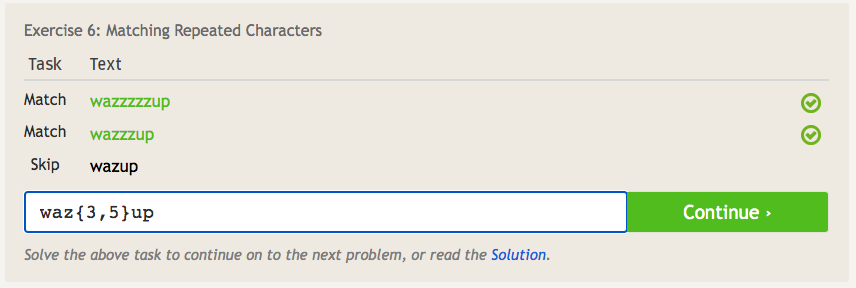

#### * Zero or more repetitions; + one or more repetitions

In [40]:
'b*' # match none, b, bb, bbb....
'b+' # match b, bb, bbb....

'b+'

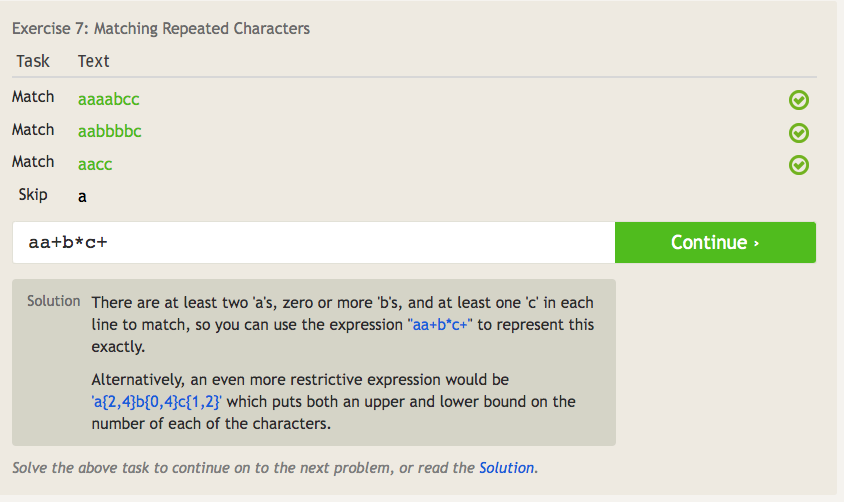

#### the ? metacharacter which denotes optionality

In [41]:
a = 'abc'
b = 'ac'

In [42]:
print(re.findall('ab?c', a))
print(re.findall('ab?c', b))

['abc']
['ac']


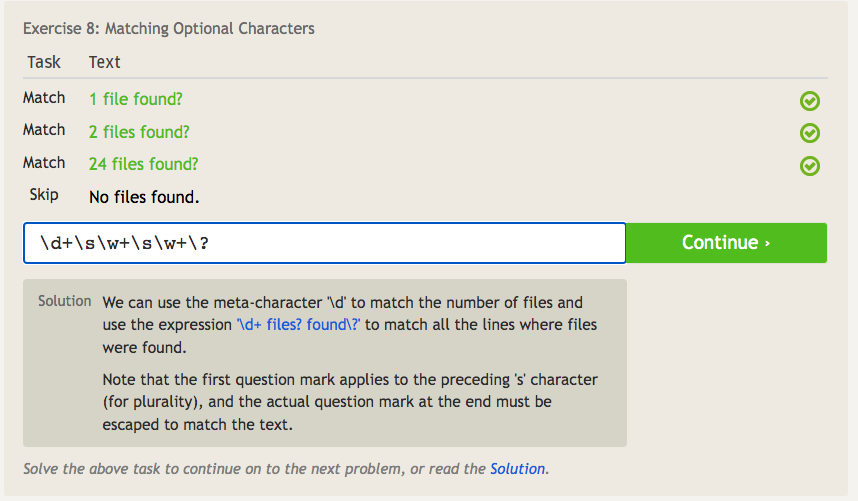

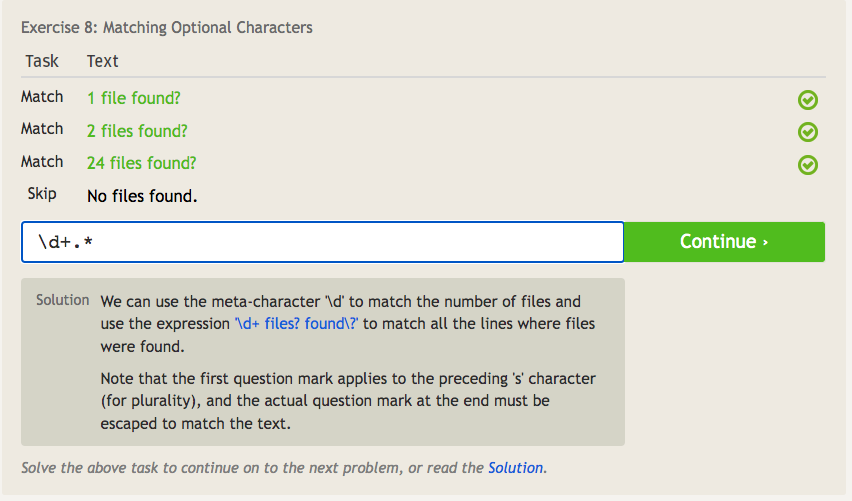

####  All this whitespace

a single space can put a wrench into the simplest regular expression

The most common forms of whitespace:
    * space (␣)
    * tab (\t)
    * new line (\n)
    * carriage return (\r)

    - match any of the specific whitespaces above (\s)


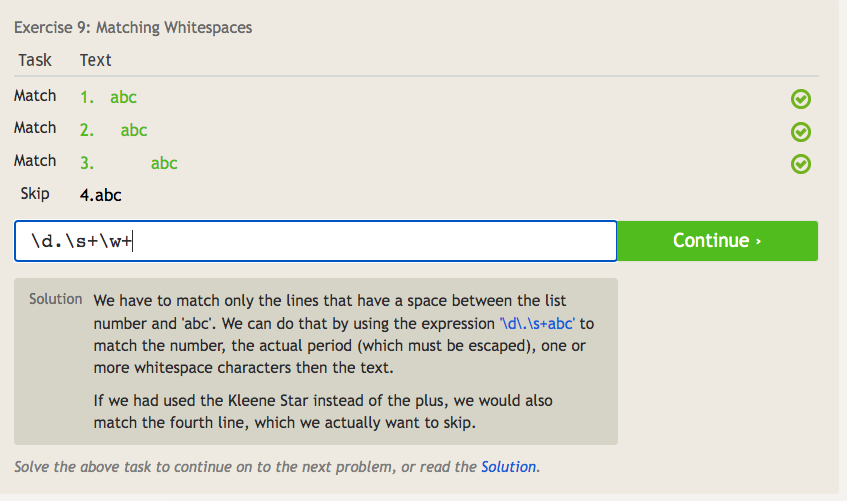

#### Starting and Ending 

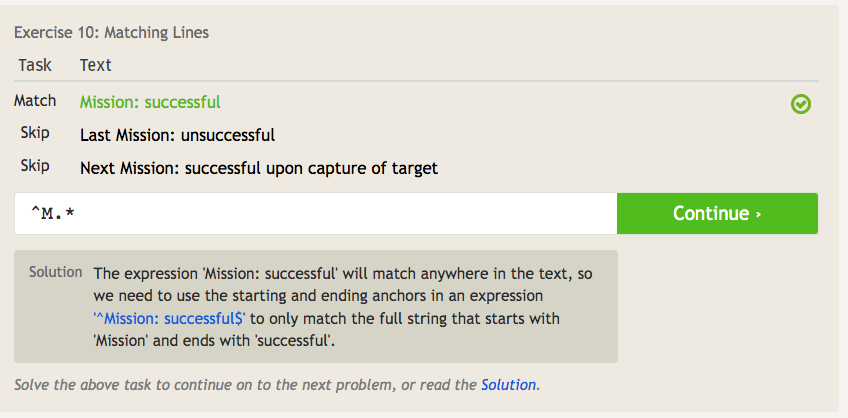

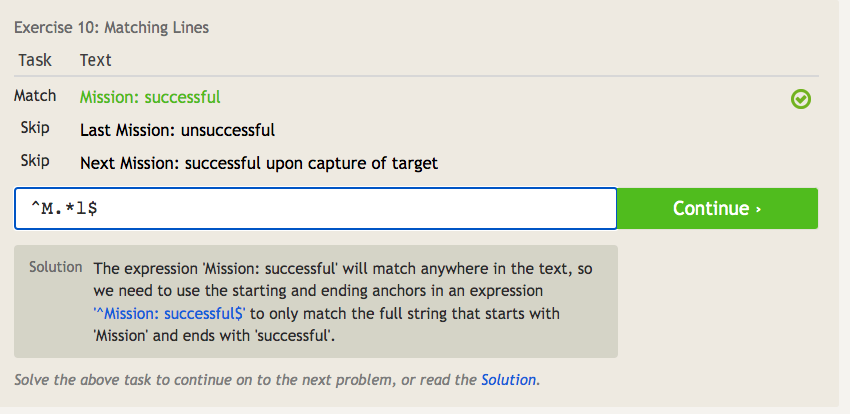

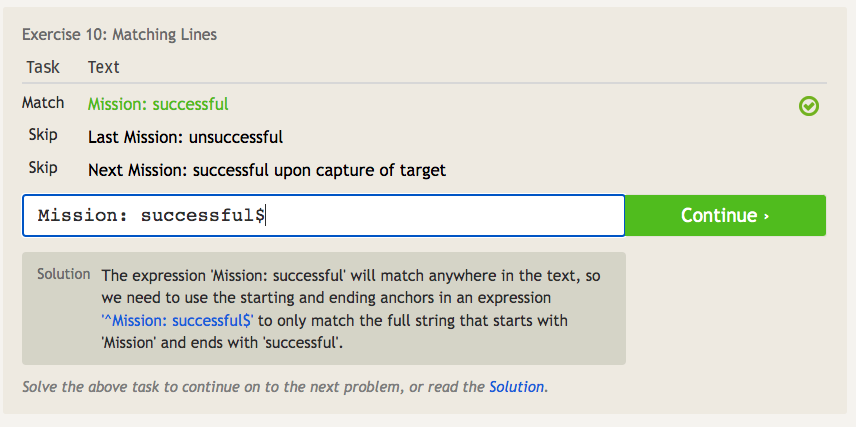

#### Match groups

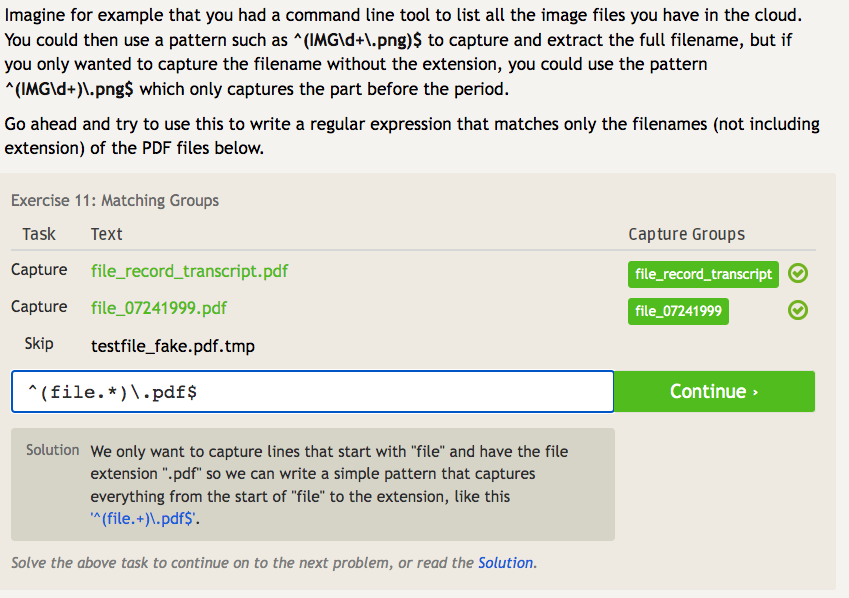

In [43]:
string

'"General Slocum" 15 June 1904 East River _ human factor _%__ %& 4'

In [44]:
print(re.findall('(.+)".*$', string))

['"General Slocum']


In [45]:
print(re.findall('^\S.*\S+$', string))
print(re.findall('\S.*\S+', string))
print(re.findall('\S.*\S', string))

print(re.findall('[\S.*\S]+', string))


['"General Slocum" 15 June 1904 East River _ human factor _%__ %& 4']
['"General Slocum" 15 June 1904 East River _ human factor _%__ %& 4']
['"General Slocum" 15 June 1904 East River _ human factor _%__ %& 4']
['"General', 'Slocum"', '15', 'June', '1904', 'East', 'River', '_', 'human', 'factor', '_%__', '%&', '4']


#### Starting and ending

Most often, the best thing to do is to be specific as possible in order to match perfectly a substring

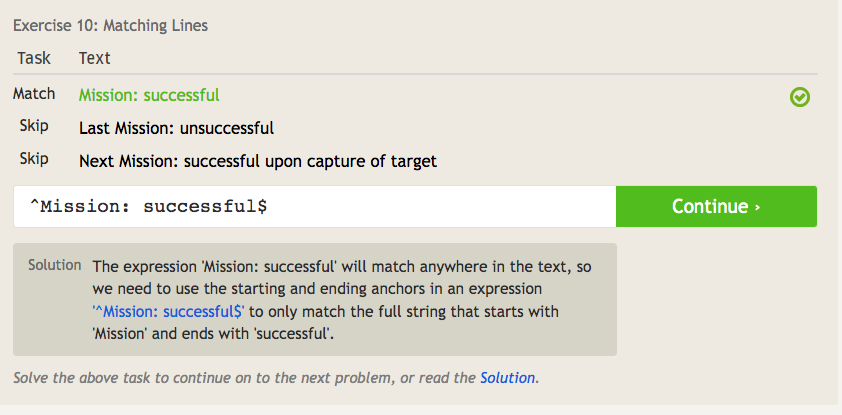

#### More group work

In [46]:
d = '1280x720'

# print groups
print(re.findall('(\d+)x(\d+)' , d))
print(re.findall('(.+)x(.+)' , d))
print('\n')

# print all
print(re.findall('(\d+x\d+)' , d))

[('1280', '720')]
[('1280', '720')]


['1280x720']


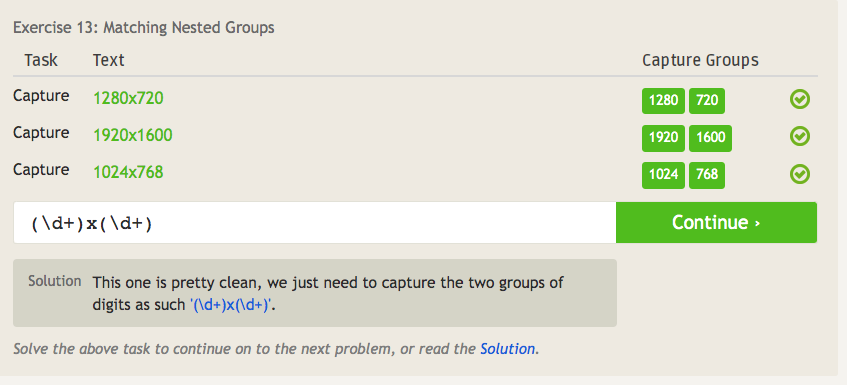

#### conditional

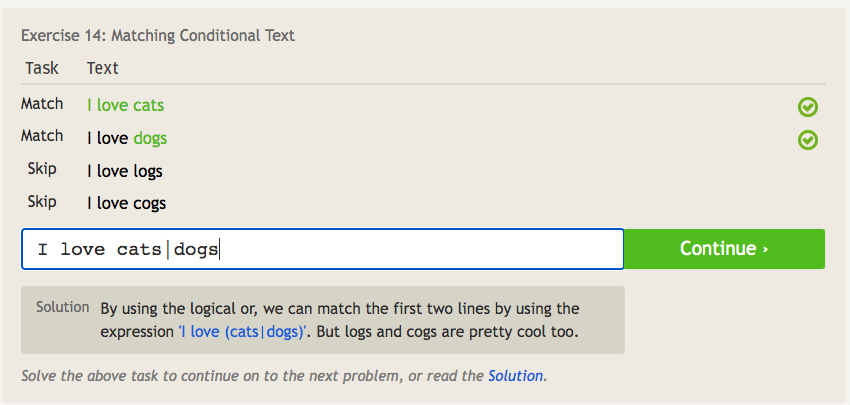

### Excercises

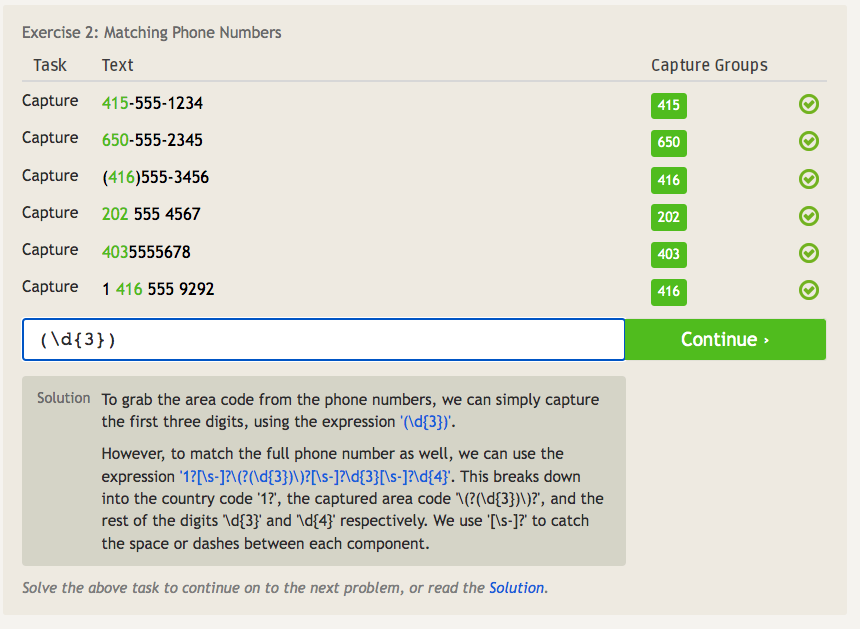

In [47]:
#### Matching Emails

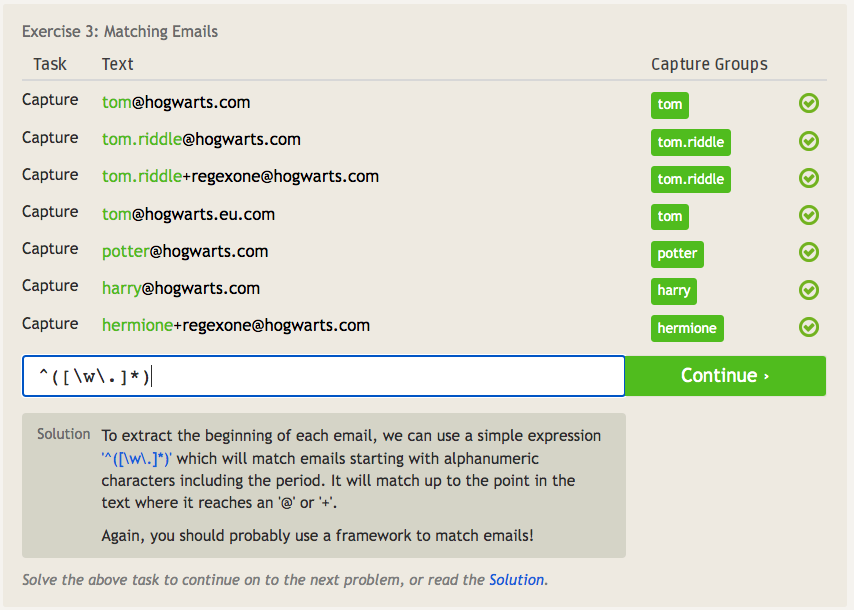

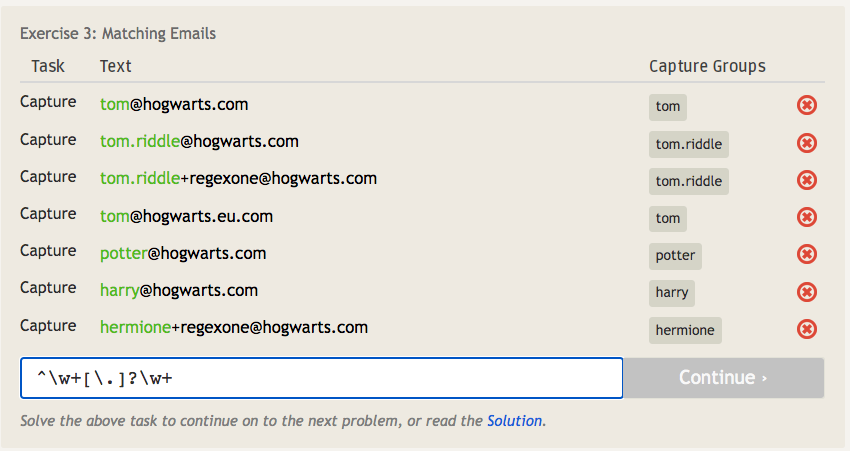

#### Capture HTML tags

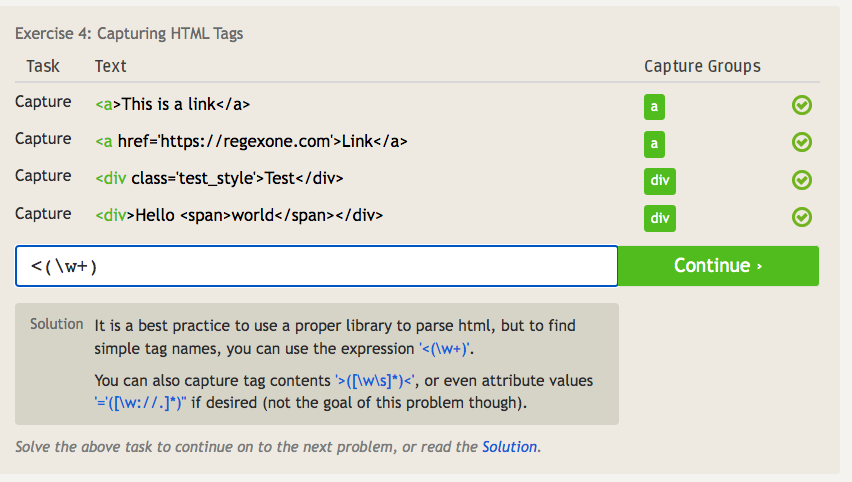

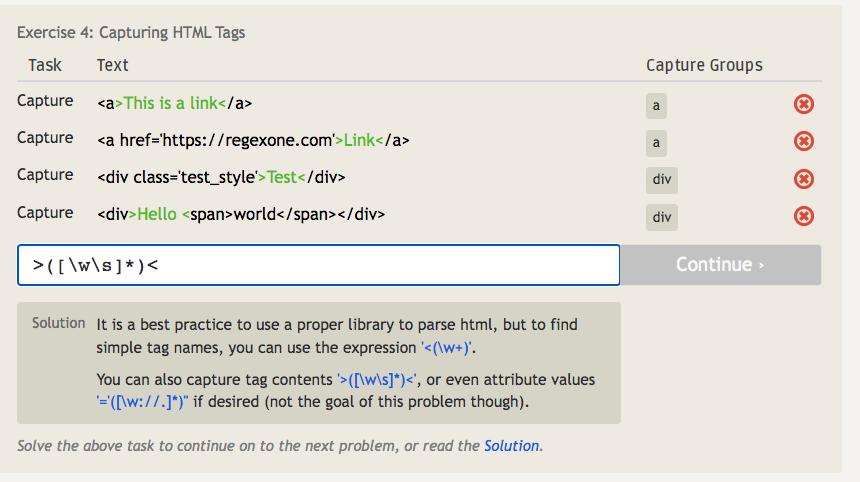


#### Matching specific filenames

In [48]:
# my solution

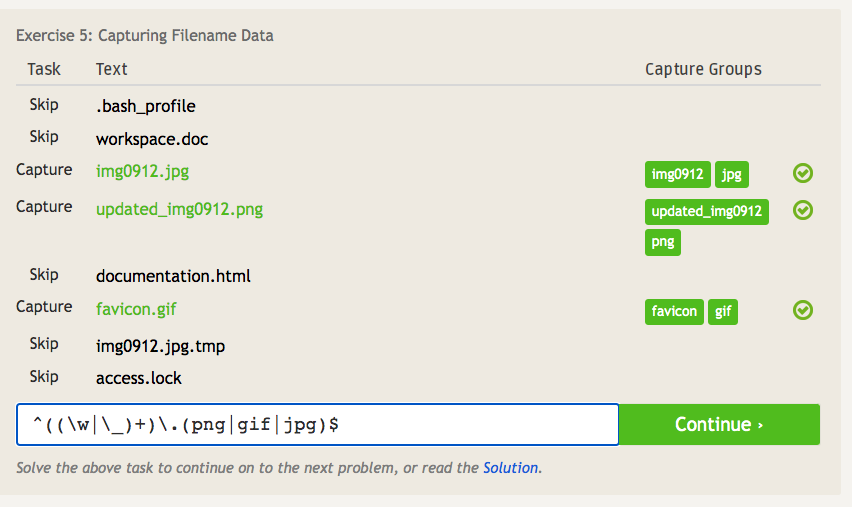

In [49]:
# site solution

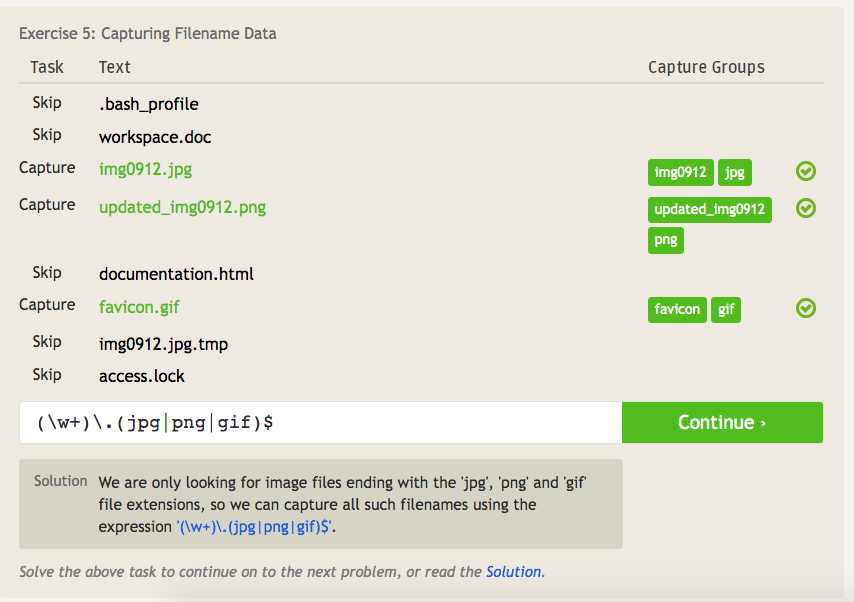

#### Trimming whitespace from start and end of line

\s    - means makes sure you are going through existing whitespaces 

In [50]:
print(re.findall('\s*\w+\s*', string))

['General ', 'Slocum', ' 15 ', 'June ', '1904 ', 'East ', 'River ', '_ ', 'human ', 'factor ', '_', '__ ', ' 4']


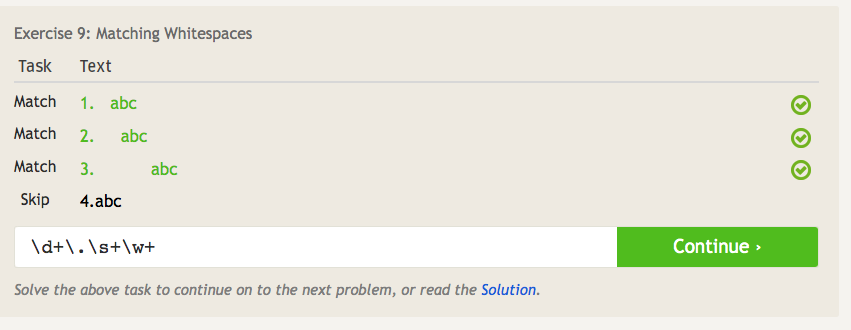

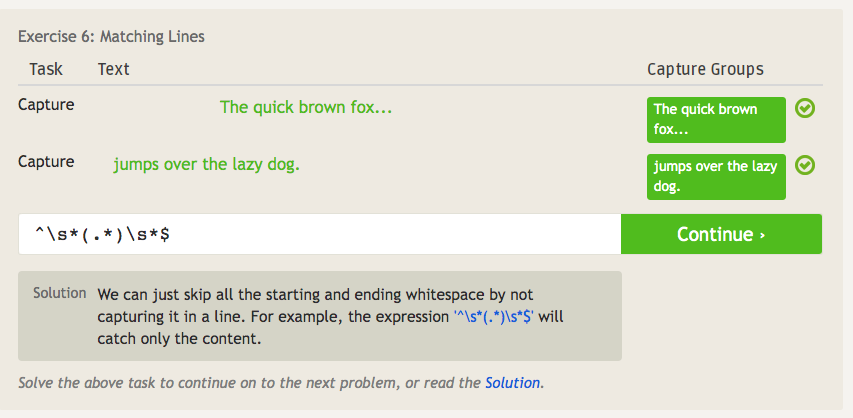

#### Extracting information from a log file

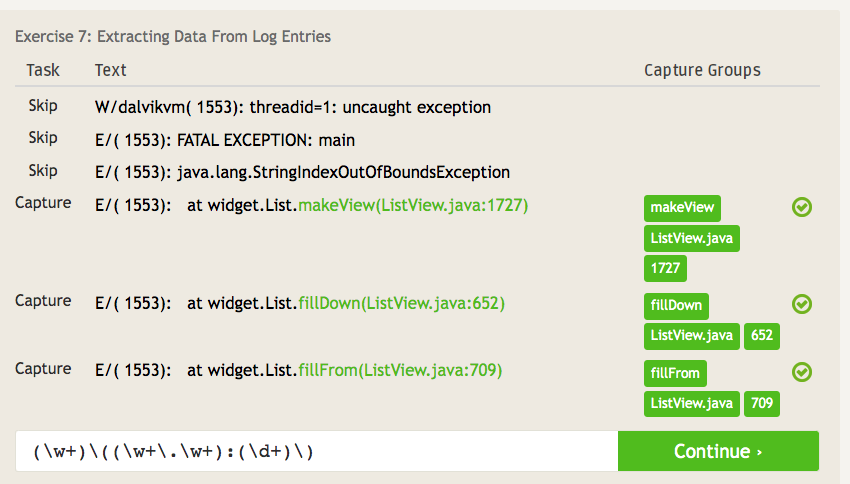

In [51]:
string

'"General Slocum" 15 June 1904 East River _ human factor _%__ %& 4'

In [52]:
print(re.findall('(\d+) (\w+)',string))
print(re.findall('(\d+ \w+)',string))


[('15', 'June'), ('1904', 'East')]
['15 June', '1904 East']


In [53]:
print(re.findall('[\d\w]+',string))
print(re.findall('[\d|\w]+',string))

['General', 'Slocum', '15', 'June', '1904', 'East', 'River', '_', 'human', 'factor', '_', '__', '4']
['General', 'Slocum', '15', 'June', '1904', 'East', 'River', '_', 'human', 'factor', '_', '__', '4']


In [54]:
print(re.findall('([A-z]+) ([A-z]+)',string))

[('General', 'Slocum'), ('East', 'River'), ('_', 'human'), ('factor', '_')]


### Split the url address into substrings 

#### Unique case

In [230]:
ex1 = 'http://www.site.com/?param1=abc&param2=dfg'

# unique case 
print(re.findall('(\w+\d\=\w+)&(\w+\d\=\w+)',ex1))
print(re.findall('(\w+\d\=\w+)',ex1))



[('param1=abc', 'param2=dfg')]
['param1=abc', 'param2=dfg']


#### LookBehind Positive

In [231]:
# Find expression A where expression B follows:  (?<=B)A
lbp = re.findall('(?<=com\/[\?|\#]).*', ex1)
print(lbp)
print(type(lbp))

['param1=abc&param2=dfg']
<class 'list'>


#### LookBehind Positive Split to string 

In [233]:
lbp = re.findall('(?<=com\/[\?|\#]).*', ex1)
# convert from list to string 
lbp_string = str(lbp).strip('[]')
print(lbp_string)

['param1=abc&param2=dfg']
'param1=abc&param2=dfg'


In [291]:
final = (re.findall('\w+[\=|\#|\$]?\w+',lbp_string))
print(final)
final = (re.findall('\w+[^&]\w+',lbp_string))
print(final)

final = (re.findall('\S.*\S(?=\&|\#|\/)|(?<=\&|\#|\/)\S.*\S',lbp_string))
final

final3 = (re.findall('\S.*\S(?=\&|\#|\/)|(?<=\&|\#|\/)\S.*\S',lbp_string))
final3

['param1=abc', 'param2=dfg']
['param1=abc', 'param2=dfg']


["'param1=abc", "param2=dfg'"]

In [235]:
ex2 = 'http://www.test.com/dir/filename.jpg?var1=foo'

In [237]:
ex2_lpb = re.findall('(?<=com).*', ex2)
ex2_str = str(ex2_lpb).strip('[]')
print(ex2_str)

# regex attempt 1
ex2_reg = (re.findall('(?<=\&|\#)?\s?.*\s?',ex2_str))
print(ex2_reg)

# regext attempt 2
ex2_reg2 = (re.findall('(\S.*\S(?=\&|\#)|(?<=\&|\#|\/)\S.*\S)', ex2_str))
print(ex2_reg2)


'/dir/filename.jpg?var1=foo'
["'/dir/filename.jpg?var1=foo'", '']
["dir/filename.jpg?var1=foo'"]


In [240]:
ex3 = 'http://www.site.com/path/folder12/this-is-text.html'

In [253]:
# solution using a special cases case regex 
print(re.findall('path/\w+/?\w+/?.*\.\w+$',ex3))
print(re.findall('(?<=com\/)\w+\/-*?.*\.\w+$',ex3))

['path/folder12/this-is-text.html']
['path/folder12/this-is-text.html']


In [ ]:
# (?<=) - positive lookbehind
print(re.findall('(?<=com).*$',str2))

In [287]:
def url_return(arr):
    url_box = []
    for url in arr:
        split_url = re.findall('(?<=com).*|(?<=co\.il).*', url)
        split_url_str = str(split_url).strip('[]')
        final = (re.findall('(\S.*\S(?=\&|\#)|(?<=\&|\#|\/)\S.*\S)', split_url_str))
        url_box.append(final)        
    return(url_box)

In [288]:
ex_arr= ['http://www.site.com/path/folder12/this-is-text.html', 
         'http://www.site.com/?param1=abc&param2=dfg',
         'https://www.yad2.co.il/vehicles/4X4',
        'https://www.youtube.com/watch?v=MEDeNqy2fek&ab_channel=lofigeek']

url_return(ex_arr)

[["path/folder12/this-is-text.html'"],
 ["'/?param1=abc", "param2=dfg'"],
 ["vehicles/4X4'"],
 ["'/watch?v=MEDeNqy2fek", "ab_channel=lofigeek'"]]

In [326]:
def url_return(arr):
    url_box = []
    for url in arr:
        split_url = re.findall('(?<=com\/[\?|\#]).*|(?<=co\.il).*|(?<=com).*', url)
        split_url_str = str(split_url).strip('[]')
        print(split_url_str)
        final = (re.findall('(\S.*\S(?=\&|\#)|(?<=\&|\#|\/)\S.*\S)', split_url_str))
        url_box.append(final)        
    return(url_box)       

url_return(ex_arr)

'/path/folder12/this-is-text.html'
'/?param1=abc&param2=dfg'
'/vehicles/4X4'
'/watch?v=MEDeNqy2fek&ab_channel=lofigeek'


[["path/folder12/this-is-text.html'"],
 ["'/?param1=abc", "param2=dfg'"],
 ["vehicles/4X4'"],
 ["'/watch?v=MEDeNqy2fek", "ab_channel=lofigeek'"]]